In [1]:
import pandas as pd
import dabest
import pathlib

svm_raw = [float(i) for i in pathlib.Path('./cdf_accuracies_svm_one_example.txt').read_text().splitlines()]
#backprop_raw = [float(i) for i in pathlib.Path('./cdf_accuracies_weighted.txt').read_text().splitlines()]
backprop_raw = [float(i) for i in pathlib.Path('./cdf_accuracies.txt').read_text().splitlines()]

svm = svm_raw[:1500]
backprop = backprop_raw[:1500]

In [49]:
df = pd.DataFrame({'Backpropagated APs' : backprop,     'Machine learning (SVM)' : svm})
#                  'Control 2' : c2,     'Test 2' : t2,
#                  'Control 3' : c3,     'Test 3' : t3,
#                  'Test 4'    : t4,     'Test 5' : t5, 'Test 6' : t6,
#                  'Gender'    : gender, 'ID'  : id_col
df

,Backpropagated APs,Machine learning (SVM)
0,0.686869,0.823232
1,0.732323,0.803030
2,0.843434,0.858586
3,0.648990,0.772727
4,0.828283,0.792929
...,...,...
1495,0.696970,0.858586
1496,0.830808,0.848485
1497,0.512626,0.815657
1498,0.750000,0.792929


In [50]:
two_groups_unpaired = dabest.load(df,idx=('Backpropagated APs','Machine learning (SVM)'), resamples=5000)

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/_classes.py:163: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(plot_data[self.__xvar],


In [25]:
two_groups_unpaired

DABEST v0.3.1
             
Good afternoon!
The current time is Tue Nov  1 15:41:21 2022.

Effect size(s) with 95% confidence intervals will be computed for:
1. Machine learning\(SVM) minus Backpropagated\APs

5000 resamples will be used to generate the effect size bootstraps.

In [72]:
two_groups_unpaired.mean_diff

DABEST v0.3.1
             
Good evening!
The current time is Mon Oct 31 19:21:31 2022.

The unpaired mean difference between Backpropagated APs and Machine learning (SVM) is 0.0219 [95%CI 0.0127, 0.0312].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/plotter.py:389: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/dabest/plotter.py:438: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categoric

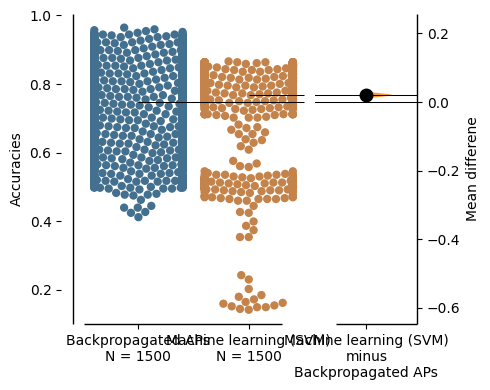

In [51]:
myplot = two_groups_unpaired.mean_diff.plot(swarm_label="Accuracies", contrast_label="Mean differene")

In [52]:
myplot.set_figwidth(7)
myplot.set_figheight(3)

In [37]:
dir(myplot.axes[0])

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [53]:
myplot.axes[0].set_xticklabels(['Backpropagated\nAPs\nN = 1500','Machine learning\n(SVM)\nN = 1500'])
#myplot.axes[1].set_xticklabels(['Machine learning\n(SVM)\n minus Backpropagated APs'])

/tmp/ipykernel_43221/552655853.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  myplot.axes[0].set_xticklabels(['Backpropagated\nAPs\nN = 1500','Machine learning\n(SVM)\nN = 1500'])


[Text(0, 0, 'Backpropagated\nAPs\nN = 1500'),
 Text(1, 0, 'Machine learning\n(SVM)\nN = 1500')]

In [55]:
myplot.axes[1].get_xticklabels()

[Text(0, 0, ''),
 Text(1, 0, 'Machine learning (SVM)\nminus\nBackpropagated APs')]

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


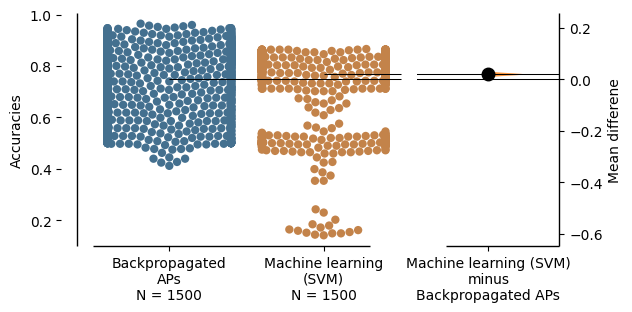

In [56]:
myplot

In [57]:
fig = myplot.get_figure()
# fig.set_figwidth(7)
# fig.set_figheight(3)
fig.savefig('Estimation_svm_vs_backprop.pdf')
fig.savefig('Estimation_svm_vs_backprop.png')

/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda/anaconda3/envs/zied2/lib/python3.8/site-packages/seaborn/categorical.py:3543: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [19]:
#two_groups_unpaired.cohens_d.plot(swarm_label="Accuracies", contrast_label="The bootstrap\ndistribtions!")

In [20]:
#two_groups_unpaired.hedges_g.plot(swarm_label="Accuracies", contrast_label="The bootstrap\ndistribtions!")

In [21]:
#two_groups_unpaired.cliffs_delta.plot(swarm_label="Accuracies", contrast_label="The bootstrap\ndistribtions!")